In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy
from scipy import stats
import seaborn as sns

Research Question:

Considering two sample average sale prices per buyer in the data, do option 0 have a significantly different mean buying price than option 1?

Population: all average sale price of per buyer. Parameter of Interest: mu1, mu2, and degree of freedom

Hypothesis:

Null Hypothesis: mu1 = mu2
Alternative Hypothesis: mu1 <> mu2

Data:

1896 option 0 mu1 = 22567.8

1859 option 1 mu2 = 24859.4

mu_1 - mu_2 = -2291.6


Step 1: input data

In [2]:
df = pd.read_csv("/Users/yaqinhei/Downloads/project/basalesdata.csv", error_bad_lines=False, engine="python")
df.head()

,user_id,test_option,sale_dt,category,orderid,sale_price,gender,age
0,19916,0.0,20200224.0,6.0,2.100010e+13,2500.0,M,25.0
1,19916,0.0,20200224.0,6.0,2.100010e+13,5000.0,M,25.0
2,19916,0.0,20200224.0,6.0,2.100010e+13,5000.0,M,25.0
3,19824,0.0,20200212.0,2.0,2.000060e+12,29970.0,M,60.0
4,19824,0.0,20200212.0,2.0,2.000060e+12,2500.0,M,60.0


In [3]:
df.tail()

,user_id,test_option,sale_dt,category,orderid,sale_price,gender,age
150512,L��� L�L �H� �� � � ��K �̌,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150513,� � ,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150514,� LL �H� �� � � ��KK�̌,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150515,� � ̌ �,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150516,NM� �H� ��,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Step 2: Data Cleansing process

In [4]:
df.describe()

,test_option,sale_dt,category,orderid,sale_price,age
count,40097.000000,4.009700e+04,40097.000000,4.009700e+04,4.009700e+04,40096.000000
mean,0.516647,2.020022e+07,4.597975,1.648506e+13,1.186761e+04,70.424232
std,0.499729,4.912304e+00,2.912871,9.182205e+12,5.141111e+04,166.293871
min,0.000000,2.020021e+07,0.000000,1.000060e+12,-1.595000e+06,16.000000
25%,0.000000,2.020022e+07,2.000000,8.000060e+12,2.900000e+03,35.000000
50%,1.000000,2.020022e+07,5.000000,1.600010e+13,7.900000e+03,41.000000
75%,1.000000,2.020022e+07,7.000000,2.400010e+13,1.541000e+04,48.000000
max,1.000000,2.020023e+07,9.000000,3.200010e+13,1.760000e+06,999.000000


Data cleansing note:

1 Notice that there is some negative value under "sale_price" column, some show negative because buyers canceled the products and refund their credit. However, some just shows negative when we deep dive the data. 

Solution：First, we want to drop those orders for sale price < 0, because whenever buyers canceled their orders later or just error input order, those orders have not close relationship with our question ‘average spending per buyer for each test option’ in my mind. 

But we need to communicate with business side to make sure why some order's price show negative in real situation.


2 Notice that some value under "age" column shows 999, but those input do not include our test result, so at this part, I think we should not deal with those value. 

3 There are some letters garbled at last row, "error_bad_lines=False" would fix this to open .csv file. dropped those rows since NAN only appear after row 40097


Below we start to deal with NAN value:

In [5]:
df.shape

(150517, 8)

In [6]:
df = df.dropna() 
df

,user_id,test_option,sale_dt,category,orderid,sale_price,gender,age
0,19916,0.0,20200224.0,6.0,2.100010e+13,2500.0,M,25.0
1,19916,0.0,20200224.0,6.0,2.100010e+13,5000.0,M,25.0
2,19916,0.0,20200224.0,6.0,2.100010e+13,5000.0,M,25.0
3,19824,0.0,20200212.0,2.0,2.000060e+12,29970.0,M,60.0
4,19824,0.0,20200212.0,2.0,2.000060e+12,2500.0,M,60.0
...,...,...,...,...,...,...,...,...
40091,19589,1.0,20200217.0,2.0,2.600010e+13,30300.0,M,26.0
40092,19589,1.0,20200213.0,3.0,2.600010e+13,23250.0,M,26.0
40093,19589,1.0,20200213.0,7.0,2.600010e+13,63800.0,M,26.0
40094,19589,1.0,20200214.0,1.0,2.600010e+13,46900.0,M,26.0


Below start to deal with negative value in colum "sale_price"

In [8]:
df.describe()

,test_option,sale_dt,category,orderid,sale_price,age
count,40096.000000,4.009600e+04,40096.000000,4.009600e+04,4.009600e+04,40096.000000
mean,0.516635,2.020022e+07,4.597940,1.648522e+13,1.186771e+04,70.424232
std,0.499729,4.912362e+00,2.912899,9.182262e+12,5.141175e+04,166.293871
min,0.000000,2.020021e+07,0.000000,1.000060e+12,-1.595000e+06,16.000000
25%,0.000000,2.020022e+07,2.000000,8.000060e+12,2.900000e+03,35.000000
50%,1.000000,2.020022e+07,5.000000,1.600010e+13,7.900000e+03,41.000000
75%,1.000000,2.020022e+07,7.000000,2.400010e+13,1.541000e+04,48.000000
max,1.000000,2.020023e+07,9.000000,3.200010e+13,1.760000e+06,999.000000


In [9]:
df.sort_values(by=['sale_price'], ascending = True)

,user_id,test_option,sale_dt,category,orderid,sale_price,gender,age
31166,6270,1.0,20200214.0,2.0,1.500010e+13,-1595000.0,M,30.0
31164,6270,1.0,20200217.0,2.0,1.500010e+13,-1595000.0,M,30.0
27109,13351,0.0,20200219.0,2.0,5.000060e+12,-1479000.0,M,45.0
27110,13351,0.0,20200219.0,2.0,5.000060e+12,-1479000.0,M,45.0
20509,12061,1.0,20200214.0,3.0,1.200010e+13,-1369660.0,M,40.0
...,...,...,...,...,...,...,...,...
25540,6044,0.0,20200224.0,6.0,2.700010e+13,1579000.0,M,54.0
31165,6270,1.0,20200214.0,2.0,1.500010e+13,1595000.0,M,30.0
31167,6270,1.0,20200214.0,2.0,1.500010e+13,1595000.0,M,30.0
34336,7487,0.0,20200223.0,4.0,3.000010e+13,1680000.0,M,31.0


In [10]:
df = df[df["sale_price"]>0]
df.shape

(36111, 8)

In [11]:
df.describe()

,test_option,sale_dt,category,orderid,sale_price,age
count,36111.000000,3.611100e+04,36111.000000,3.611100e+04,3.611100e+04,36111.000000
mean,0.507602,2.020022e+07,4.575309,1.658210e+13,1.527320e+04,72.055219
std,0.499949,4.918436e+00,2.905237,9.228180e+12,4.506016e+04,170.787184
min,0.000000,2.020021e+07,0.000000,1.000060e+12,6.000000e+01,16.000000
25%,0.000000,2.020022e+07,2.000000,8.000060e+12,4.000000e+03,35.000000
50%,1.000000,2.020022e+07,5.000000,1.600010e+13,8.980000e+03,40.000000
75%,1.000000,2.020022e+07,7.000000,2.500010e+13,1.675000e+04,48.000000
max,1.000000,2.020023e+07,9.000000,3.200010e+13,1.760000e+06,999.000000


In [12]:
meandf = df.groupby(['test_option','user_id']).sale_price.mean().to_frame().reset_index()
meandf.columns = ['test_option', 'user_id', 'avg_saleprice']
meandf

,test_option,user_id,avg_saleprice
0,0.0,10012,10593.617021
1,0.0,10015,33533.333333
2,0.0,10020,10839.473684
3,0.0,10026,3833.333333
4,0.0,1003,10152.500000
...,...,...,...
3750,1.0,997,35170.000000
3751,1.0,9970,11899.565217
3752,1.0,9977,14155.833333
3753,1.0,9980,10266.000000


Step 3: plot average sale price distribution

In [13]:
optionA = meandf[meandf["test_option"] == 0]

optionB = meandf[meandf["test_option"] == 1]

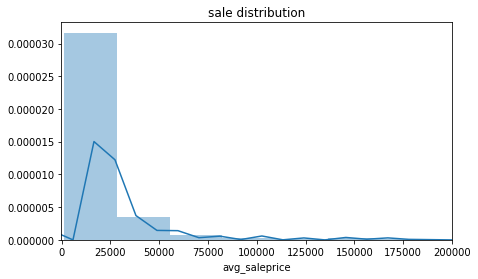

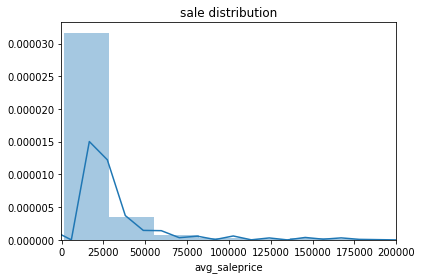

In [14]:
plt.figure(figsize=(7,4))
sns.distplot(optionA["avg_saleprice"])
plt.title("sale distribution")
plt.xlim(-100,200000)
plt.show()

sns.distplot(optionA["avg_saleprice"])
plt.title("sale distribution")
plt.xlim(-100,200000)
plt.show()

According the plot, We plot the histogram of the data to check if it approximately follows a Normal distribution, so we use t-test.

In [15]:
n1 = len(optionA)
mu1 = optionA["avg_saleprice"].mean()
sd1 = optionA["avg_saleprice"].std()

(n1, mu1, sd1)


(1896, 22567.766252096506, 52918.253489260474)

In [16]:
n2 = len(optionB)
mu2 = optionB["avg_saleprice"].mean()
sd2 = optionB["avg_saleprice"].std()

(n2, mu2, sd2)

(1859, 24859.38500067868, 62873.50382802919)

Step 4: 


Use Levene test to check variance equal or unequal
Use two-sample t-test since variance statistically equal.

P-value for levene test = 1.55 >(alpha = .05), we accept Null hypothesis that variance are statistically equal between option A and option B.

In [17]:
scipy.stats.levene(optionA['avg_saleprice'], optionB['avg_saleprice'], center = 'trimmed')

LeveneResult(statistic=54.95795134141681, pvalue=1.548152186975087e-13)

In [18]:
t, p_two, degreef = sm.stats.ttest_ind(optionA["avg_saleprice"], optionB["avg_saleprice"],alternative="two-sided")

print("t =", t, "p_two =", p_two, "degree of freedom=", degreef)

t = -1.2092473015201697 p_two = 0.22664402169028497 degree of freedom= 3753.0


In [19]:
alpha = 0.05

In [20]:
if(p_two <alpha/2):
    print('NOT Reject Null hypothesis')
    print('Alternative hypothesis is reject, there is NO statistically difference between option A and option B')
else:
    print('Reject Null hypothesis')
    print('Alternative hypothesis is accept, there is statistically difference between option A and option B')

Reject Null hypothesis
Alternative hypothesis is accept, there is statistically difference between option A and option B


Conclusion of the hypothesis test

Since the p-value (0.22) is greater than alpha(0.05)/2, with degree of freedom = 3753. we reject the Null hypothesis. That means the average sale price per buyer is statistically difference between the two group.


Step 5: CI 

In [21]:
t_ci = 2.0141
se = np.sqrt(np.square(sd1/n1) + np.square(sd2/n2))
sample_mean = (mu1-mu2)
a = (sample_mean - t_ci * se).astype(np.int64)
b = (sample_mean + t_ci * se).astype(np.int64)

In [22]:
print(' CI of difference between two mean, 95% confidence level CI = [%f, %f]', (a,b))

 CI of difference between two mean, 95% confidence level CI = [%f, %f] (-2379, -2203)


Step 6: Cohen's d to indicate standardised difference between two means

In [23]:
'''
Cohen's d is small
'''
sp = np.sqrt(((n1-1) * np.square(sd1) + (n2-1) * np.square(sd2)) / (n1 + n2 -2))
d = (mu1 - mu2) / sp
print('d = ', d)

d =  -0.03946946468484605


boxplot below shows 

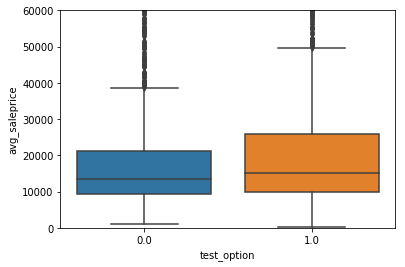

In [24]:
sns.boxplot(x="test_option", y="avg_saleprice", data=meandf)
plt.ylim(0,60000)
plt.show()

Histogram below show approximate normal distribution.

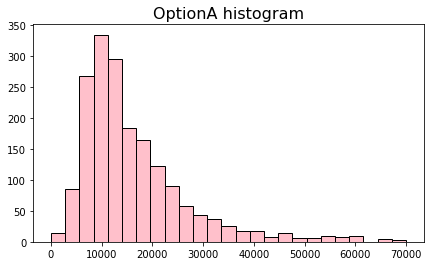

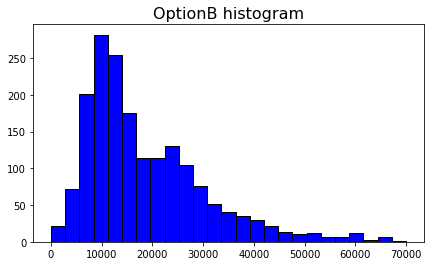

In [25]:
plt.figure(figsize=(7,4))
plt.title("OptionA histogram",fontsize=16)
plt.hist(optionA["avg_saleprice"].dropna(),edgecolor='k',color='pink',bins=25, range = [0,70000])
plt.show()

plt.figure(figsize=(7,4))
plt.title("OptionB histogram",fontsize=16)
plt.hist(optionB["avg_saleprice"].dropna(),edgecolor='k',color='blue',bins=25, range = [0,70000])
plt.show()

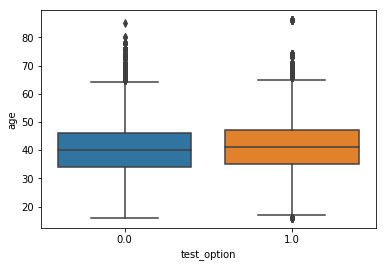

In [26]:
sns.boxplot(x="test_option", y="age", data=df[df["age"]<100])
plt.show()

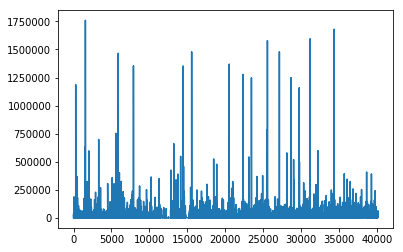

In [27]:
df.sale_price.plot()